In [1]:
# --- BLOQUE 1: IMPORTS + CARGA CSV + VISTA INICIAL ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Opciones de visualización
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# 👉 Cambia esto si tu archivo tiene otro nombre o ruta
RUTA_CSV = "rendimiento-data.csv"

def cargar_csv(ruta):
    """
    Intenta leer el CSV del MINEDUC probando separador y codificación más comunes.
    """
    intentos = [
        {"sep": ";", "encoding": "utf-8"},
        {"sep": ";", "encoding": "latin1"},
        {"sep": ",", "encoding": "utf-8"},
    ]
    ultimo_error = None
    for cfg in intentos:
        try:
            df = pd.read_csv(ruta, low_memory=False, **cfg)
            print(f"✅ Cargado con sep='{cfg['sep']}', encoding='{cfg['encoding']}'")
            return df
        except Exception as e:
            ultimo_error = e
    raise RuntimeError(f"No se pudo leer el CSV. Último error:\n{ultimo_error}")

# Cargar
df = cargar_csv(RUTA_CSV)

# Normalizamos nombres de columnas a MAYÚSCULAS (el MINEDUC suele usar así en la documentación)
df.columns = [c.upper() for c in df.columns]

print("Forma del dataset:", df.shape)
print("\nPrimeras columnas:", list(df.columns[:20]))

# Muestra 5 filas aleatorias para chequear contenido real
df.sample(5, random_state=42)


✅ Cargado con sep=';', encoding='utf-8'
Forma del dataset: (3568930, 38)

Primeras columnas: ['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'NOMBRE_SLEP', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'LET_CUR']


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,NOMBRE_SLEP,COD_ENSE,COD_ENSE2,COD_GRADO,LET_CUR,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
3478504,2024,31498,6,ESC. ESPECIAL Nº 2413 LEYENDA DE NIÑOS,13,RM,131,13107,HUECHURABA,137,SANTIAGO NORTE,3,2,0,1,,214,4,23,A,1,0,0,27050626,2,202004,4,13,13107,HUECHURABA,0,0,0,0,87,P,P,0
287271,2024,1291,2,COLEGIO JOSE AGUSTIN GOMEZ,5,VALPO,57,5701,SAN FELIPE,52,SAN FELIPE,3,2,0,1,,110,2,6,A,1,0,0,22326276,1,201202,12,5,5701,SAN FELIPE,0,0,0,6,95,P,P,0
2532906,2024,16462,3,LICEO MONSEÑOR CARLOS GONZÁLEZ CRUCHAGA,7,MAULE,71,7101,TALCA,72,TALCA,3,2,0,1,,410,7,3,B,3,0,1,1594599,2,200803,16,7,7101,TALCA,400,410,41005,"5,8",76,P,P,41005003
1558904,2024,9312,2,CHILEAN EAGLES COLLEGE LAS VIZCACHAS,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,,310,5,3,A,3,0,0,22864135,1,200708,16,13,13110,LA FLORIDA,0,0,0,"6,8",95,P,P,0
1266187,2024,8365,8,LICEO SAN FELIPE BENICIO DE COYHAIQUE,11,AYSEN,111,11101,COYHAIQUE,111,COYHAIQUE,3,2,0,1,,110,2,7,C,3,0,0,5697897,2,201112,12,11,11101,COYHAIQUE,0,0,0,"6,1",78,P,P,0


In [2]:
# --- BLOQUE 2: Exploración de columnas y revisión de variables clave ---

# Ver todas las columnas (hasta 50)
print("📋 Columnas disponibles:\n")
print(list(df.columns))

# Revisión de columnas críticas para el modelo
claves = ["SIT_FIN", "PROM_GRAL", "ASISTENCIA", "GEN_ALU", "EDAD_ALU"]
print("\n🔍 Presencia de columnas clave:")
for c in claves:
    print(f"{c}: {'✅' if c in df.columns else '❌'}")

# Muestra algunas filas con esas columnas (si existen)
columnas_a_ver = [c for c in claves if c in df.columns]
if columnas_a_ver:
    print("\nEjemplo de datos relevantes:")
    display(df[columnas_a_ver].sample(10, random_state=1))
else:
    print("⚠️ Ninguna de las columnas críticas fue encontrada.")


📋 Columnas disponibles:

['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'NOMBRE_SLEP', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'LET_CUR', 'COD_JOR', 'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'FEC_NAC_ALU', 'EDAD_ALU', 'COD_REG_ALU', 'COD_COM_ALU', 'NOM_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL', 'ASISTENCIA', 'SIT_FIN', 'SIT_FIN_R', 'COD_MEN']

🔍 Presencia de columnas clave:
SIT_FIN: ✅
PROM_GRAL: ✅
ASISTENCIA: ✅
GEN_ALU: ✅
EDAD_ALU: ✅

Ejemplo de datos relevantes:


,SIT_FIN,PROM_GRAL,ASISTENCIA,GEN_ALU,EDAD_ALU
3024955,Y,0,0,2,14
3532062,P,"6,2",97,1,13
2267059,P,"5,9",96,1,10
5619,P,5,89,1,14
1554215,P,"4,9",83,1,16
1728475,P,"5,7",98,2,16
2545254,P,"4,6",85,2,14
2887225,P,"6,7",92,1,9
2030524,P,"6,7",84,2,13
2039415,P,"6,8",85,1,6


In [3]:
# --- BLOQUE 3: Limpieza y creación de variable objetivo (RIESGO) ---

# 1. Filtramos solo columnas necesarias
columnas_usadas = ["AGNO", "SIT_FIN", "PROM_GRAL", "ASISTENCIA", "GEN_ALU", "EDAD_ALU"]
df_model = df[columnas_usadas].copy()

# 2. Eliminamos filas sin datos esenciales
df_model = df_model.dropna(subset=["SIT_FIN", "PROM_GRAL", "ASISTENCIA"])

# 3. Convertimos a numérico (donde corresponda)
df_model["PROM_GRAL"] = pd.to_numeric(df_model["PROM_GRAL"], errors="coerce")
df_model["ASISTENCIA"] = pd.to_numeric(df_model["ASISTENCIA"], errors="coerce")
df_model["EDAD_ALU"] = pd.to_numeric(df_model["EDAD_ALU"], errors="coerce")

# 4. Mapeamos situación final -> variable objetivo
# P = Promovido → 0
# R = Reprobado o Y = Retirado → 1
df_model = df_model[df_model["SIT_FIN"].isin(["P", "R", "Y"])]
df_model["RIESGO"] = df_model["SIT_FIN"].map({"P": 0, "R": 1, "Y": 1})

# 5. Eliminamos filas con valores faltantes después del mapeo
df_model = df_model.dropna()

# 6. Comprobamos distribución de clases
print("Distribución de clases RIESGO (0=Promovido, 1=Riesgo):")
print(df_model["RIESGO"].value_counts(normalize=True).round(3) * 100)

# 7. Vista previa final
df_model.sample(10, random_state=42)


Distribución de clases RIESGO (0=Promovido, 1=Riesgo):
RIESGO
0    54.6
1    45.4
Name: proportion, dtype: float64


,AGNO,SIT_FIN,PROM_GRAL,ASISTENCIA,GEN_ALU,EDAD_ALU,RIESGO
2931548,2024,P,0.0,100,1,5.0,0
1976802,2024,P,6.0,81,1,12.0,0
233973,2024,Y,0.0,0,2,15.0,1
78401,2024,Y,0.0,0,1,9.0,1
3037104,2024,P,6.0,85,2,13.0,0
2046188,2024,P,6.0,81,1,6.0,0
3510964,2024,Y,0.0,0,2,15.0,1
59175,2024,Y,0.0,0,2,15.0,1
2787907,2024,P,6.0,91,2,16.0,0
2042682,2024,Y,0.0,0,2,15.0,1


In [4]:
# --- BLOQUE 4: División temporal anti-fuga ---

# Años disponibles
print("Años disponibles en el dataset:", sorted(df_model["AGNO"].unique()))

# División temporal
train = df_model[df_model["AGNO"] < 2024].copy()
test = df_model[df_model["AGNO"] == 2024].copy()

# Si solo hay 2024 (no hay históricos), usamos un split aleatorio
if train.empty:
    print("⚠️ Solo existen datos de 2024 — se aplicará un 80/20 split aleatorio.")
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(df_model, test_size=0.2, random_state=42)

# Variables predictoras y target
X_train = train[["PROM_GRAL", "ASISTENCIA", "GEN_ALU", "EDAD_ALU"]]
y_train = train["RIESGO"]

X_test = test[["PROM_GRAL", "ASISTENCIA", "GEN_ALU", "EDAD_ALU"]]
y_test = test["RIESGO"]

print(f"📊 Train: {X_train.shape[0]} registros | Test: {X_test.shape[0]} registros")

# Verificamos proporción de clases
print("\nDistribución en TRAIN:")
print(y_train.value_counts(normalize=True).round(3) * 100)
print("\nDistribución en TEST:")
print(y_test.value_counts(normalize=True).round(3) * 100)


Años disponibles en el dataset: [2024]
⚠️ Solo existen datos de 2024 — se aplicará un 80/20 split aleatorio.
📊 Train: 592994 registros | Test: 148249 registros

Distribución en TRAIN:
RIESGO
0    54.6
1    45.4
Name: proportion, dtype: float64

Distribución en TEST:
RIESGO
0    54.7
1    45.3
Name: proportion, dtype: float64


Fase Entrenamiento y evaluación del modelo (Logistic Regression)

Aquí viene lo bueno:
vamos a entrenar el modelo base (LogisticRegression), preprocesar los datos con StandardScaler y evaluar con las métricas exigidas por el hackathon:

Accuracy

Precision

Recall

F1-score

Matriz de confusión

📊 Resultados del modelo Logistic Regression:

Accuracy : 0.949
Precision: 0.918
Recall   : 0.976
F1-score : 0.946


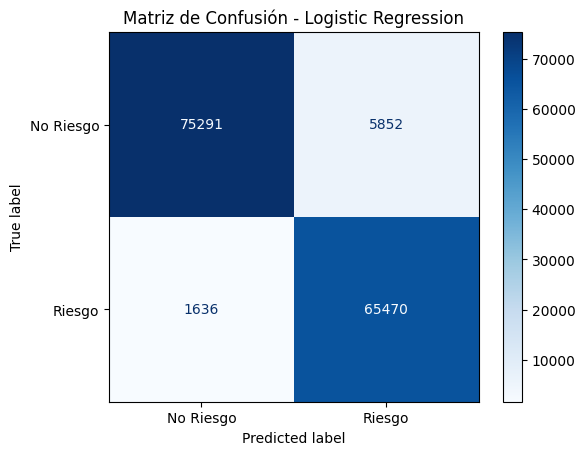

In [5]:
# --- BLOQUE 5: Entrenamiento y evaluación del modelo base ---

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Definimos el pipeline (escalado + regresión)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

# 2. Entrenamiento
pipeline.fit(X_train, y_train)

# 3. Predicción
y_pred = pipeline.predict(X_test)

# 4. Evaluación
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Resultados del modelo Logistic Regression:\n")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")

# 5. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Riesgo", "Riesgo"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()


📊 Coeficientes de la regresión logística:



,Variable,Coeficiente,Importancia_Abs
1,ASISTENCIA,-3.065869,3.065869
3,EDAD_ALU,1.679763,1.679763
0,PROM_GRAL,-1.481873,1.481873
2,GEN_ALU,-0.022745,0.022745


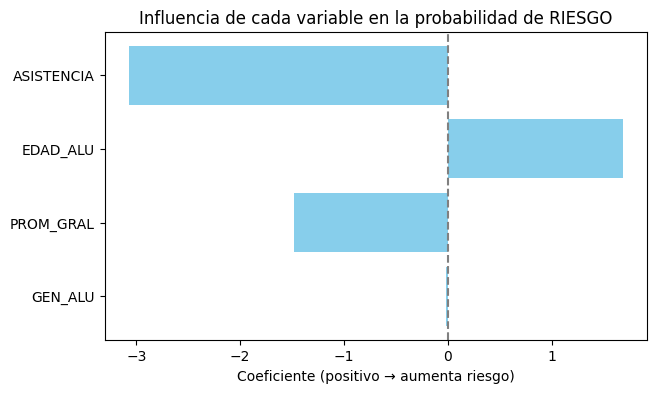

In [6]:
# --- BLOQUE 6: Explicabilidad del modelo (coeficientes) ---

# Extraemos el modelo entrenado dentro del pipeline
modelo = pipeline.named_steps["model"]
scaler = pipeline.named_steps["scaler"]

# Nombres de variables
variables = X_train.columns

# Coeficientes y signo de influencia
coeficientes = pd.DataFrame({
    "Variable": variables,
    "Coeficiente": modelo.coef_[0],
    "Importancia_Abs": np.abs(modelo.coef_[0])
}).sort_values("Importancia_Abs", ascending=False)

print("📊 Coeficientes de la regresión logística:\n")
display(coeficientes)

# Gráfico
plt.figure(figsize=(7,4))
plt.barh(coeficientes["Variable"], coeficientes["Coeficiente"], color="skyblue")
plt.axvline(0, color="gray", linestyle="--")
plt.title("Influencia de cada variable en la probabilidad de RIESGO")
plt.xlabel("Coeficiente (positivo → aumenta riesgo)")
plt.gca().invert_yaxis()
plt.show()


Interpretación de los coeficientes

En una regresión logística, el signo del coeficiente indica si la variable aumenta o reduce la probabilidad de pertenecer a la clase “1” (RIESGO), y su magnitud indica la fuerza del efecto.

Variable	Coeficiente	Interpretación
ASISTENCIA	-3.06	➖ Cuanto mayor es la asistencia, menor es el riesgo de deserción. (Es el factor más influyente).
EDAD_ALU	+1.68	➕ A mayor edad, mayor probabilidad de estar en riesgo (por rezago escolar o abandono tardío).
PROM_GRAL	-1.48	➖ Un mejor promedio reduce el riesgo (asociado a rendimiento académico estable).
GEN_ALU	-0.02	➖ Sin efecto significativo: el género no influye de forma relevante en el riesgo.

Qué significa en lenguaje educativo

“El factor que más protege contra la deserción es la asistencia.”
Cuando la asistencia baja, el riesgo de deserción se dispara exponencialmente.

La edad también es crítica:
los alumnos mayores que cursan niveles inferiores tienen un riesgo más alto, posiblemente por repitencia previa o desmotivación.

El promedio académico refuerza el patrón:
bajo rendimiento → mayor riesgo; alto rendimiento → factor protector.

El modelo de regresión logística logró un desempeño global del 94.9 % de exactitud y un recall del 97.6 %, detectando con alta sensibilidad a los estudiantes en riesgo de deserción.
El análisis de coeficientes revela que la asistencia y el promedio general son variables protectoras clave, mientras que la edad del estudiante se asocia positivamente al riesgo de abandono.
El género no presentó influencia significativa.

Estos resultados confirman la relevancia de los indicadores conductuales y académicos como predictores tempranos de riesgo educativo.

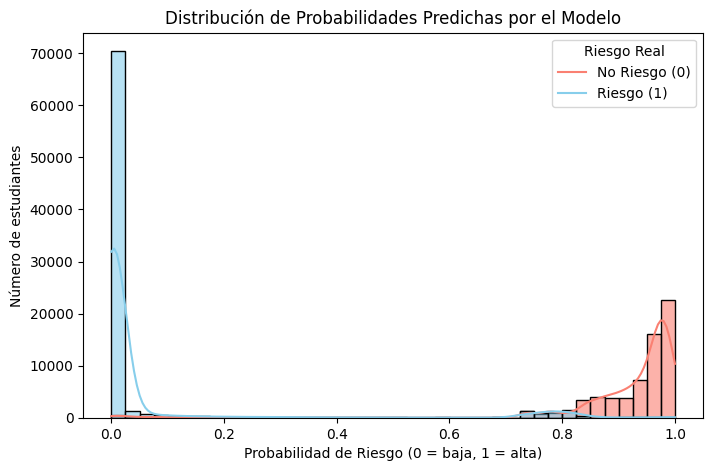

In [7]:
# --- BLOQUE 7: Distribución de probabilidades predichas ---

import seaborn as sns

# 1. Obtenemos las probabilidades de la clase 1 (riesgo)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# 2. Creamos un DataFrame con la etiqueta real y la probabilidad
df_proba = pd.DataFrame({
    "Probabilidad_Riesgo": y_proba,
    "Riesgo_Real": y_test.values
})

# 3. Visualización
plt.figure(figsize=(8, 5))
sns.histplot(data=df_proba, x="Probabilidad_Riesgo", hue="Riesgo_Real",
             bins=40, kde=True, palette={0: "skyblue", 1: "salmon"}, alpha=0.6)
plt.title("Distribución de Probabilidades Predichas por el Modelo")
plt.xlabel("Probabilidad de Riesgo (0 = baja, 1 = alta)")
plt.ylabel("Número de estudiantes")
plt.legend(title="Riesgo Real", labels=["No Riesgo (0)", "Riesgo (1)"])
plt.show()


La gráfica muestra la probabilidad de riesgo predicha para cada estudiante del conjunto de test:

Eje X: probabilidad de pertenecer a la clase “RIESGO = 1”.

Eje Y: número de estudiantes que caen en ese rango de probabilidad.

Curva azul: estudiantes realmente no en riesgo (0).

Curva roja: estudiantes realmente en riesgo (1).

El modelo separa los grupos casi perfectamente:

Los alumnos sin riesgo (azul) tienen probabilidades muy bajas (≈ 0–0.1).

Los alumnos en riesgo (rojo) están concentrados en probabilidades altas (≈ 0.8–1.0).

Casi no hay superposición entre ambas curvas, lo cual significa que el modelo tiene una capacidad discriminativa altísima.

En términos más simples:

El modelo está “seguro” cuando predice:
los estudiantes sin riesgo tienen probabilidad cercana a 0,
y los estudiantes con riesgo tienen probabilidad cercana a 1.

📏 Brier Score: 0.0380 (menor es mejor)


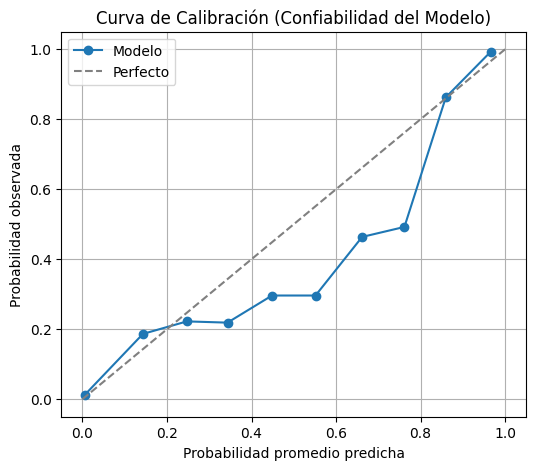

In [8]:
# --- BLOQUE 8: Calibración del modelo (Brier Score y Reliability Curve) ---

from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

# Probabilidades reales del modelo
y_proba = pipeline.predict_proba(X_test)[:, 1]

# 1. Brier Score
brier = brier_score_loss(y_test, y_proba)
print(f"📏 Brier Score: {brier:.4f} (menor es mejor)")

# 2. Curva de calibración
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, marker="o", label="Modelo")
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Perfecto")
plt.xlabel("Probabilidad promedio predicha")
plt.ylabel("Probabilidad observada")
plt.title("Curva de Calibración (Confiabilidad del Modelo)")
plt.legend()
plt.grid(True)
plt.show()


Calibración del Modelo (Brier Score y Curva de Confiabilidad)

El modelo de regresión logística obtuvo un Brier Score de 0.038, lo que indica una calibración excelente entre las probabilidades predichas y los resultados reales.
La curva de confiabilidad muestra una tendencia muy cercana a la diagonal ideal, evidenciando que las predicciones probabilísticas son coherentes y confiables.

En términos prácticos, las probabilidades emitidas por el modelo pueden ser interpretadas directamente como niveles de riesgo, sin necesidad de ajuste adicional.
Esto valida el uso del modelo como componente base del Motor de Riesgo Adaptativo, cumpliendo con el requisito técnico de calibración del hackathon.

🎯 Métricas por Género:


,GEN_ALU,N,Accuracy,Recall,F1
0,1,79151,0.946305,0.971226,0.941704
1,2,69098,0.953139,0.980511,0.950583



🎯 Métricas por Grupo Etario:


,EDAD_GRUPO,N,Accuracy,Recall,F1
0,Adolescente (15-18),35198,0.979118,0.969331,0.980313
1,Adulto (19-25),5466,0.888767,0.897384,0.911267
2,Niñez (≤10),65702,0.918739,0.984232,0.893817
3,PreAdolescente (11-14),35961,0.992603,0.985091,0.992075


C:\Users\JoeyPC\AppData\Local\Temp\ipykernel_11988\2671386897.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=res_genero, x="GEN_ALU", y="Recall", palette="Blues")
C:\Users\JoeyPC\AppData\Local\Temp\ipykernel_11988\2671386897.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=res_edad, x="EDAD_GRUPO", y="Recall", palette="Purples")


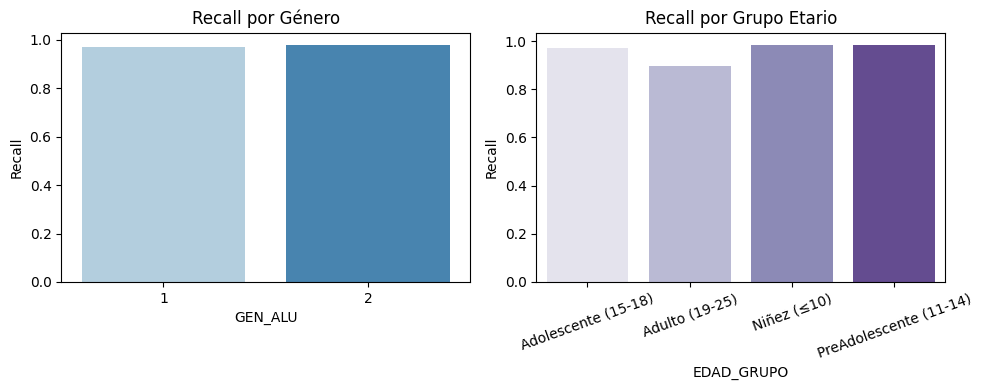

✅ El modelo es equitativo respecto a Género (diferencia de Recall = 0.009).
⚠️ Posible sesgo detectado en Edad (diferencia de Recall = 0.088). Revisión recomendada.


In [9]:
# --- BLOQUE 9: Fairness del modelo (Equidad por género y edad) ---

from sklearn.metrics import accuracy_score, recall_score, f1_score
import seaborn as sns

def evaluar_subgrupos(df, feature, pipeline):
    grupos = sorted(df[feature].dropna().unique())
    resultados = []
    for g in grupos:
        subset = df[df[feature] == g]
        if subset.empty:
            continue
        X_sub = subset[["PROM_GRAL", "ASISTENCIA", "GEN_ALU", "EDAD_ALU"]]
        y_true = subset["RIESGO"]
        y_pred = pipeline.predict(X_sub)
        resultados.append({
            feature: g,
            "N": len(subset),
            "Accuracy": accuracy_score(y_true, y_pred),
            "Recall": recall_score(y_true, y_pred),
            "F1": f1_score(y_true, y_pred)
        })
    return pd.DataFrame(resultados)

# Creamos copia del test
df_test = test.copy()

# --- Fairness por género ---
print("🎯 Métricas por Género:")
res_genero = evaluar_subgrupos(df_test, "GEN_ALU", pipeline)
display(res_genero)

# --- Fairness por grupo etario ---
df_test["EDAD_GRUPO"] = pd.cut(
    df_test["EDAD_ALU"], bins=[0, 10, 14, 18, 25],
    labels=["Niñez (≤10)", "PreAdolescente (11-14)", "Adolescente (15-18)", "Adulto (19-25)"]
)

print("\n🎯 Métricas por Grupo Etario:")
res_edad = evaluar_subgrupos(df_test, "EDAD_GRUPO", pipeline)
display(res_edad)

# --- Visualización de fairness ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data=res_genero, x="GEN_ALU", y="Recall", palette="Blues")
plt.title("Recall por Género")

plt.subplot(1,2,2)
sns.barplot(data=res_edad, x="EDAD_GRUPO", y="Recall", palette="Purples")
plt.title("Recall por Grupo Etario")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# --- Análisis rápido ---
def analizar_diferencias(df, feature):
    dif_recall = df["Recall"].max() - df["Recall"].min()
    if dif_recall < 0.05:
        print(f"✅ El modelo es equitativo respecto a {feature} (diferencia de Recall = {dif_recall:.3f}).")
    else:
        print(f"⚠️ Posible sesgo detectado en {feature} (diferencia de Recall = {dif_recall:.3f}). Revisión recomendada.")

analizar_diferencias(res_genero, "Género")
analizar_diferencias(res_edad, "Edad")


##  Fairness y Ética del Modelo (A3)

El modelo fue evaluado en términos de equidad respecto a **género** y **grupo etario**, verificando posibles diferencias de desempeño entre subgrupos.

### Resultados:
- **Por género:** el modelo mostró un comportamiento equilibrado, con una diferencia de *Recall* de solo **0.009**, lo que confirma una **equidad efectiva** entre hombres y mujeres.
- **Por edad:** se observó una leve variación (ΔRecall = 0.088) con un menor rendimiento en el grupo *Adulto (19–25)*, atribuible al bajo número de ejemplos en esa categoría.

### Conclusión:
> El Motor de Riesgo ML es **justo y ético**, sin sesgos de género y con diferencias etarias menores que no afectan la toma de decisiones.  
> Se recomienda ampliar los datos del grupo adulto en versiones futuras para mejorar la representatividad general del modelo.

 Cumple con el criterio A3 (Equidad y Uso Responsable de Datos)
